<b>Random Forest
 
<b>Assignment


<b>About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
<b>Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Random forests\Company_Data (1).csv')

<b>EDA

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [8]:
data['Sales'].median()

7.49

In [9]:
data.corr()

C:\Users\CSC\AppData\Local\Temp\ipykernel_5188\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [10]:
a=[]
for i in data['Sales']:
    if i > data['Sales'].median():
        a.append('High')
    else:
        a.append('Low')
a

['High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Hig

In [11]:
data_2 = data.copy()

In [12]:
data_2["Sales"] = a
data_2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


<b>VISUALIZATION

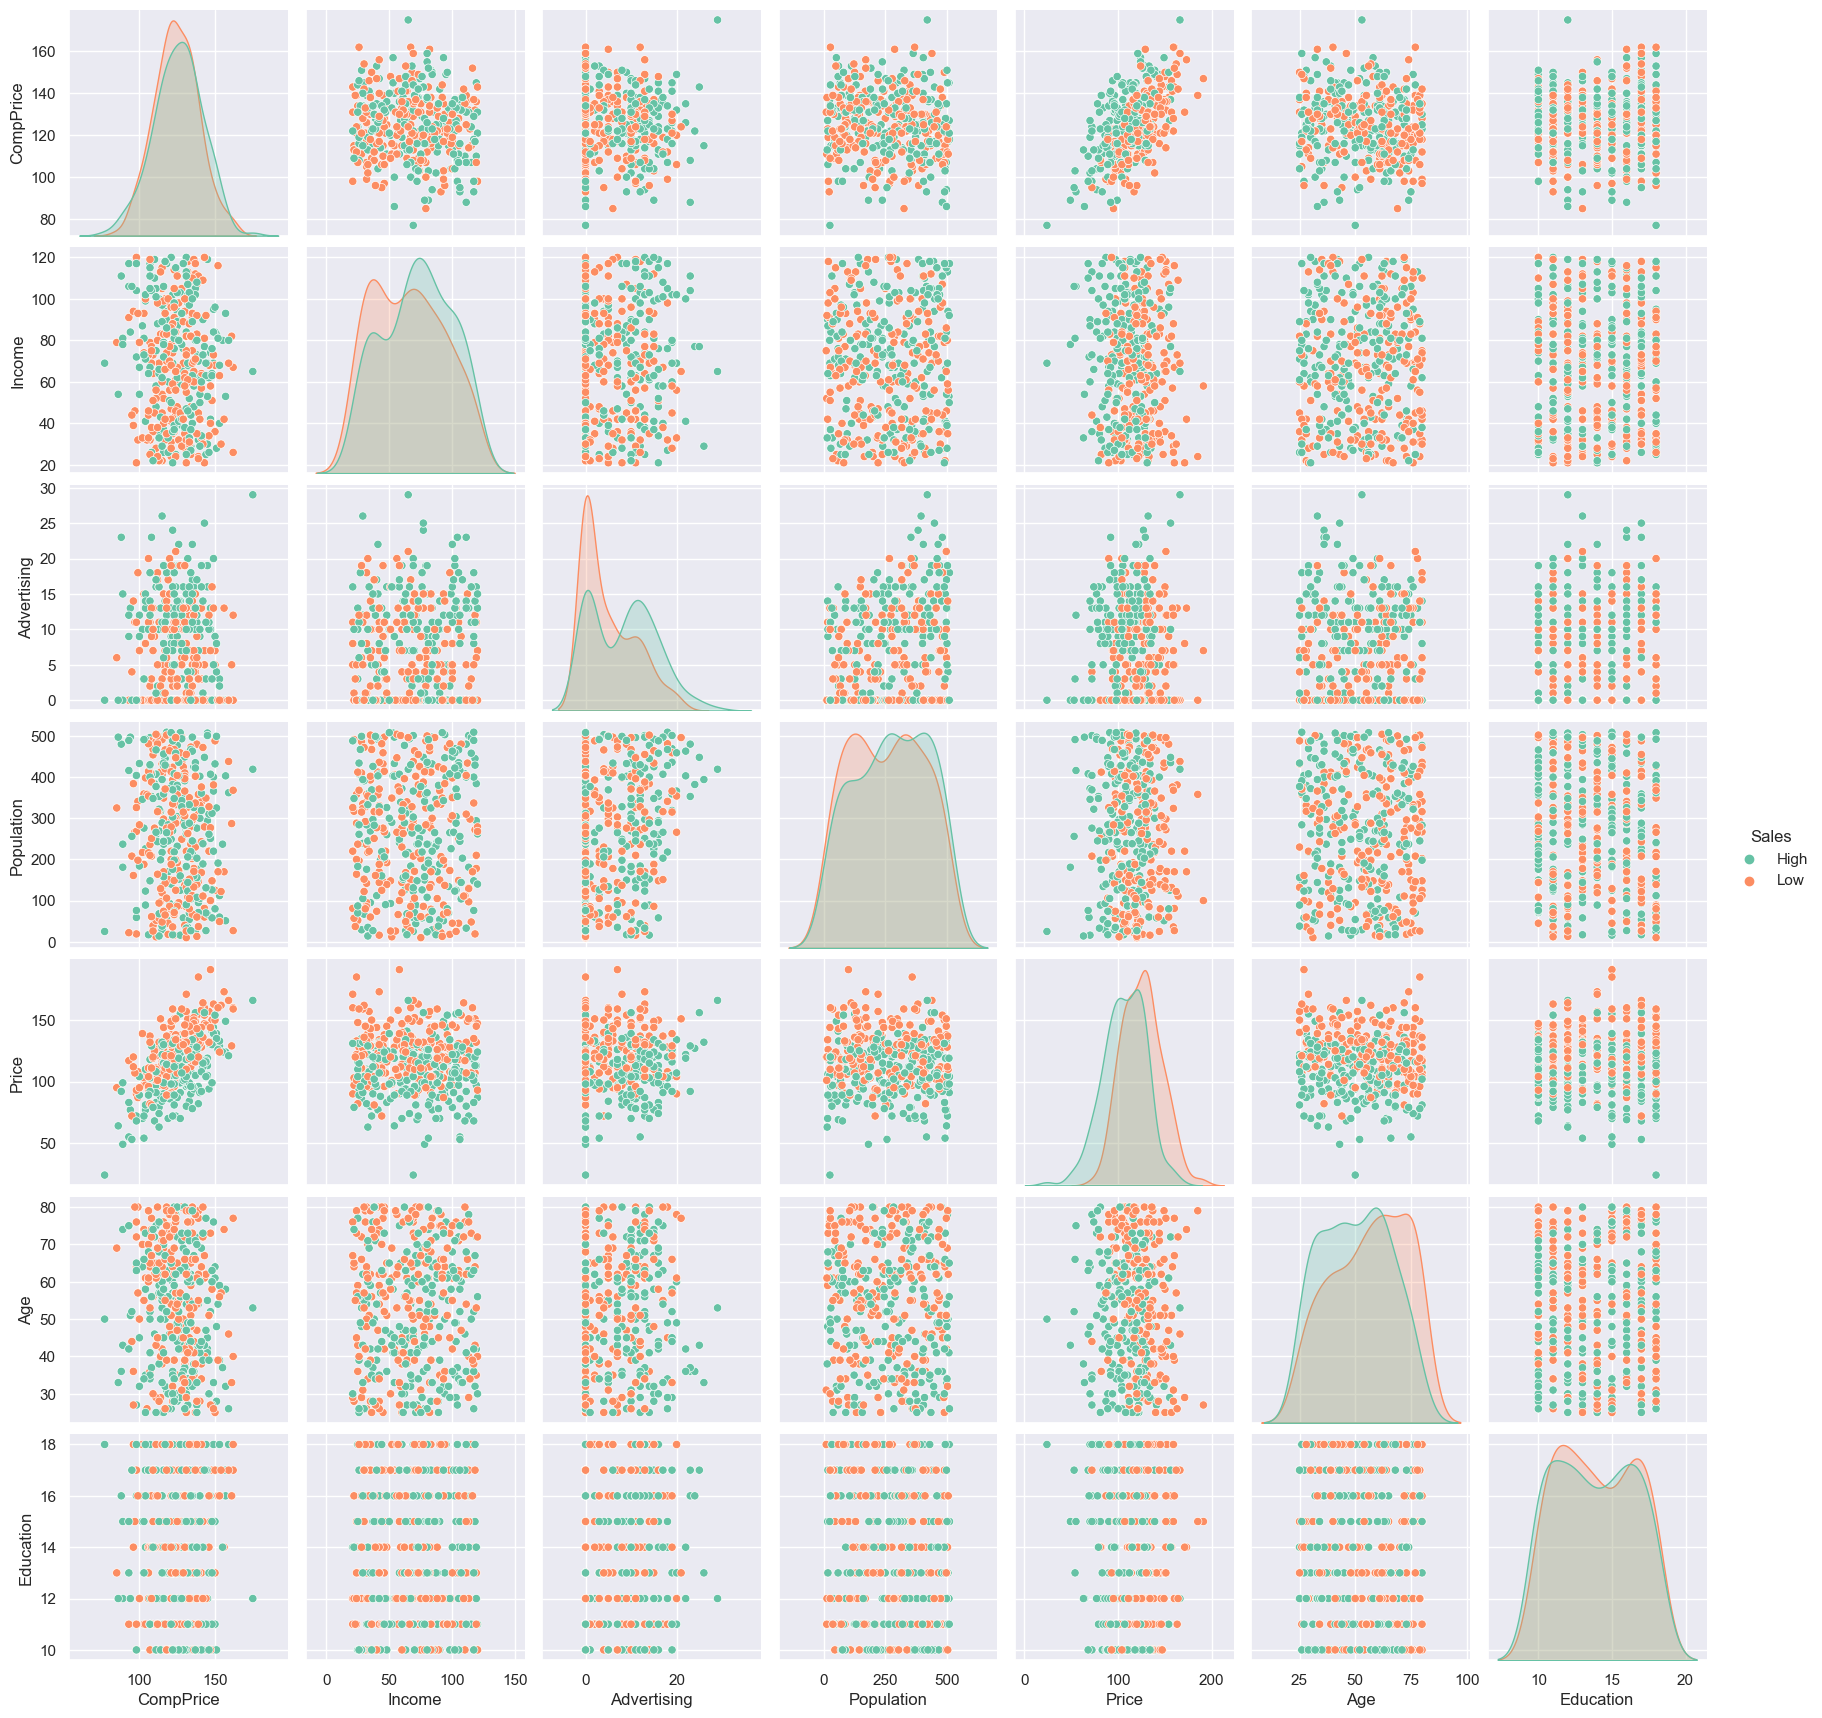

In [13]:
sns.pairplot(data_2,hue="Sales",palette='Set2')

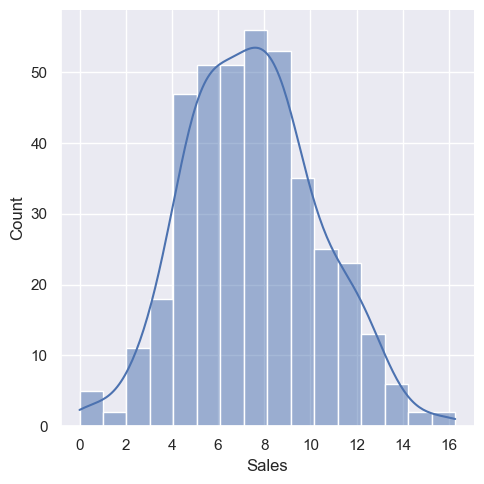

In [14]:
sns.displot(data["Sales"],kde=True)

<Axes: >

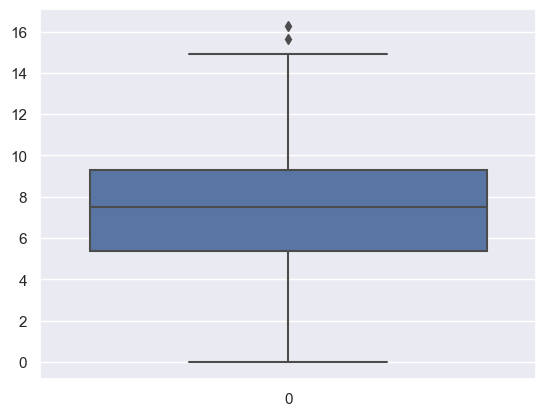

In [15]:
sns.boxplot(data["Sales"])

<b>Since Outliers don't effect classification models, we can ignore them

<Axes: xlabel='Sales', ylabel='count'>

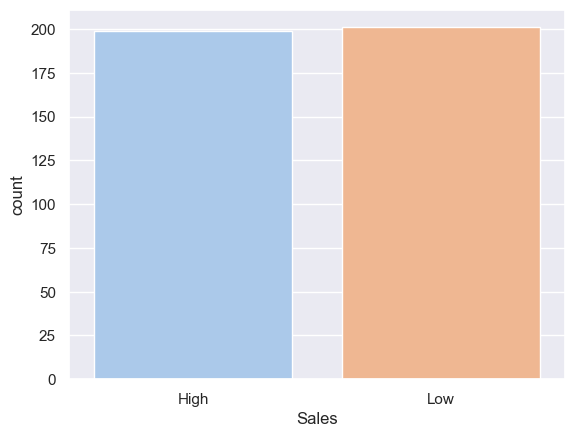

In [16]:
sns.countplot(x=data_2['Sales'],data=data_2,palette='pastel')

<b>DATA TRANSFORMATION

In [17]:
cat_var = pd.get_dummies(data_2[['Urban','US']])
cat_var

,Urban_No,Urban_Yes,US_No,US_Yes
0,0,1,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,1,0
...,...,...,...,...
395,0,1,0,1
396,1,0,0,1
397,0,1,0,1
398,0,1,0,1


In [18]:
maper = data_2['ShelveLoc'].map({'Bad':0,'Medium':1,'Good':2})
maper

0      0
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    2
Name: ShelveLoc, Length: 400, dtype: int64

In [19]:
data_2['ShelveLoc'] = maper

In [20]:
data_3 = pd.concat([data_2,cat_var],axis=1)
data_3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,0,42,17,Yes,Yes,0,1,0,1
1,High,111,48,16,260,83,2,65,10,Yes,Yes,0,1,0,1
2,High,113,35,10,269,80,1,59,12,Yes,Yes,0,1,0,1
3,Low,117,100,4,466,97,1,55,14,Yes,Yes,0,1,0,1
4,Low,141,64,3,340,128,0,38,13,Yes,No,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,2,33,14,Yes,Yes,0,1,0,1
396,Low,139,23,3,37,120,1,55,11,No,Yes,1,0,0,1
397,Low,162,26,12,368,159,1,40,18,Yes,Yes,0,1,0,1
398,Low,100,79,7,284,95,0,50,12,Yes,Yes,0,1,0,1


In [21]:
data_4 = data_3.drop(['ShelveLoc','Urban','US'],axis=1)
data_4

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,42,17,0,1,0,1
1,High,111,48,16,260,83,65,10,0,1,0,1
2,High,113,35,10,269,80,59,12,0,1,0,1
3,Low,117,100,4,466,97,55,14,0,1,0,1
4,Low,141,64,3,340,128,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,33,14,0,1,0,1
396,Low,139,23,3,37,120,55,11,1,0,0,1
397,Low,162,26,12,368,159,40,18,0,1,0,1
398,Low,100,79,7,284,95,50,12,0,1,0,1


C:\Users\CSC\AppData\Local\Temp\ipykernel_5188\3879467149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_4.corr(),annot=True,cmap='rainbow')


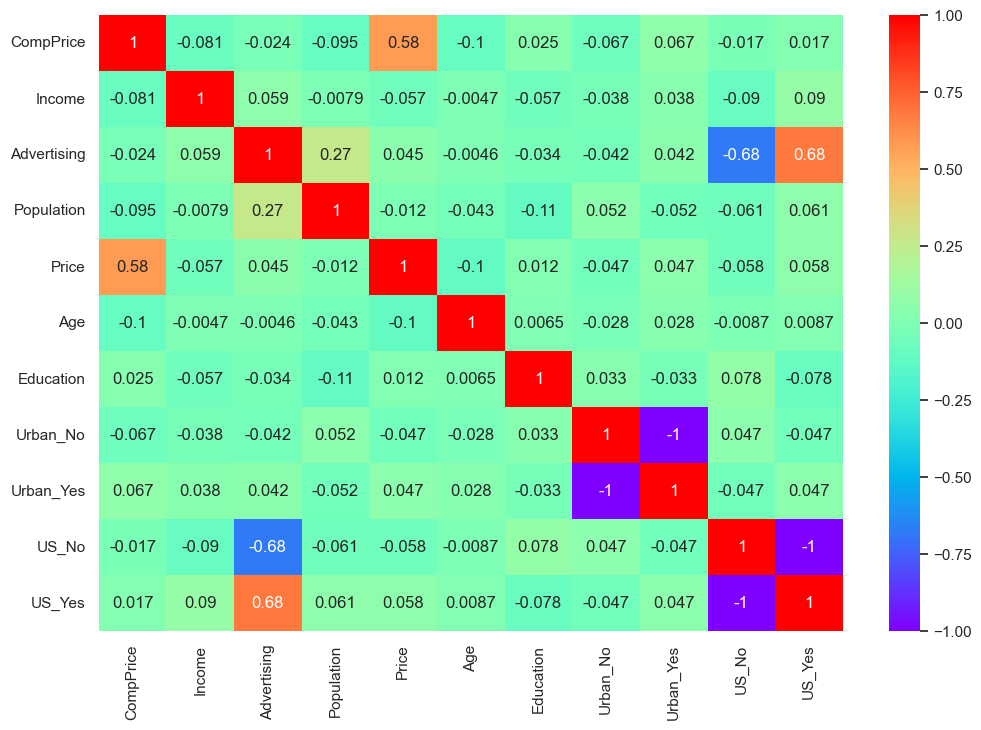

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data_4.corr(),annot=True,cmap='rainbow')
plt.show()

<b>X and Y

In [23]:
x = data_4.drop(['Sales'],axis=1)
y = data_4['Sales']

In [24]:
y.value_counts()

Low     201
High    199
Name: Sales, dtype: int64

<b>MODEL BUILDING

In [25]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [26]:
#Let us standardize the data for better results
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ...,  0.64686916,
        -0.74188112,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.64686916,
        -0.74188112,  0.74188112]])

In [27]:
#Criterion = Entropy
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=101)
model_1 = RandomForestClassifier(n_estimators=10,max_features=5,criterion='entropy',random_state=15)

In [28]:
model_1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=10,
                       random_state=15)

In [29]:
y_pred = model_1.predict(x_test)
y_pred

array(['Low', 'High', 'High', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'High',
       'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High',
       'High', 'High', 'Low'], dtype=object)

In [30]:
print(confusion_matrix(y_test,y_pred))

[[30  8]
 [12 30]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.71      0.79      0.75        38
         Low       0.79      0.71      0.75        42

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



In [32]:
model_1.score(x_train,y_train)

0.990625

In [33]:
model_1.score(x_test,y_test)

0.75

In [34]:
yt = LabelEncoder().fit_transform(y_test)
yp = LabelEncoder().fit_transform(y_pred)

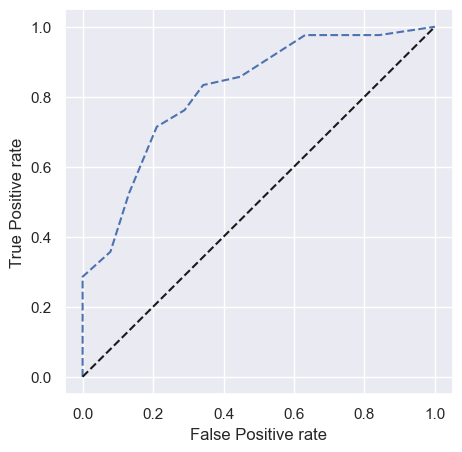

In [35]:
fpr,tpr,threshold = roc_curve(yt,model_1.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [36]:
auc

0.7518796992481204

In [37]:
#Criteron = Gini
model_2 = RandomForestClassifier(n_estimators=10,max_features=5,criterion='gini',random_state=16)
model_2.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=10, random_state=16)

In [38]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

array(['Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'High',
       'High'], dtype=object)

In [39]:
print(confusion_matrix(y_test,y_pred_2))

[[30  8]
 [13 29]]


In [40]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

        High       0.70      0.79      0.74        38
         Low       0.78      0.69      0.73        42

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



In [41]:
yp2 = LabelEncoder().fit_transform(y_pred_2)

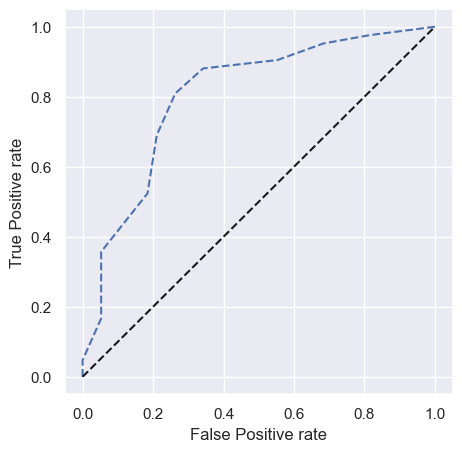

In [42]:
fpr,tpr,threshold = roc_curve(yt,model_2.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp2)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [43]:
auc

0.7399749373433584

<b>Hypertuning using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
model_s = RandomForestClassifier(n_jobs=-1,random_state=42)
param_grid = {'criterion':['entropy','gini'],'max_depth':[2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators':[10,25,30,50,100,200]}
grid_search = GridSearchCV(model_s,param_grid,scoring='accuracy',cv=5,return_train_score=True)

In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [46]:
grid_search.cv_results_

{'mean_fit_time': array([0.59036021, 0.03440881, 0.04669394, 0.06939964, 0.1255847 ,
        0.19860625, 0.01663122, 0.03728957, 0.04566379, 0.06336575,
        0.14543166, 0.20840969, 0.01454544, 0.02937193, 0.04573579,
        0.06650786, 0.12417693, 0.20955753, 0.0177155 , 0.03326764,
        0.03943672, 0.06752253, 0.12365699, 0.20479431, 0.0156651 ,
        0.04151034, 0.04693642, 0.06428385, 0.1235702 , 0.20574212,
        0.0178318 , 0.03731222, 0.04765835, 0.06541238, 0.12340894,
        0.21453786, 0.01803575, 0.03874197, 0.04782138, 0.06505837,
        0.12810102, 0.22338438, 0.0174015 , 0.04054732, 0.04586816,
        0.06953893, 0.12245746, 0.20462356, 0.01551991, 0.03932571,
        0.04564657, 0.0690763 , 0.12910585, 0.20829015, 0.01452141,
        0.0437696 , 0.04450469, 0.06747308, 0.12241206, 0.20653076,
        0.01657267, 0.04134388, 0.0373167 , 0.06849589, 0.12233582,
        0.20953102, 0.01996036, 0.03977475, 0.05101647, 0.06539183,
        0.12115192, 0.20717435,

In [47]:
grid_search.best_score_

0.7375

In [48]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [49]:
#Let us build the model using the best estimator from the GridSearchCV
model_3 = RandomForestClassifier(criterion='gini',max_depth=10,min_samples_leaf=10,n_estimators=50,n_jobs=-1,random_state=42)
model_3.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [50]:
y_pred_3 = model_3.predict(x_test)
y_pred_3

array(['Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High', 'High'],
      dtype=object)

In [51]:
print(confusion_matrix(y_test,y_pred_3))

[[27 11]
 [11 31]]


In [52]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

        High       0.71      0.71      0.71        38
         Low       0.74      0.74      0.74        42

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



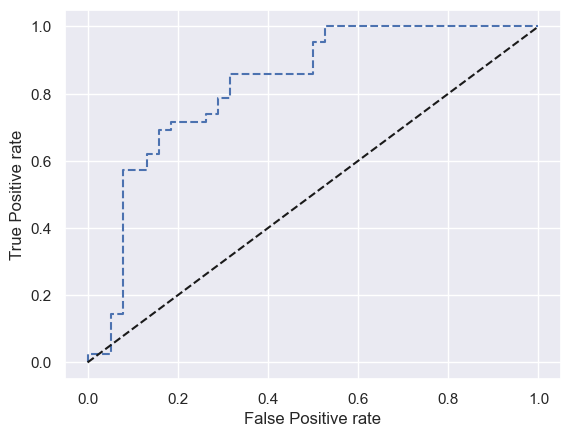

In [53]:
yp3 = LabelEncoder().fit_transform(y_pred_3)
fpr,tpr,threshold = roc_curve(yt,model_3.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp3)
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [54]:
auc

0.724310776942356

In [55]:
model_3.feature_importances_

array([0.12351823, 0.0973147 , 0.14066198, 0.05738867, 0.3554541 ,
       0.15571174, 0.03169105, 0.00599207, 0.00534451, 0.01193105,
       0.01499189])

In [56]:
importance = pd.DataFrame(model_3.feature_importances_,index=x.columns,columns=['Impotances'])
importance

,Impotances
CompPrice,0.123518
Income,0.097315
Advertising,0.140662
Population,0.057389
Price,0.355454
Age,0.155712
Education,0.031691
Urban_No,0.005992
Urban_Yes,0.005345
US_No,0.011931


<b>Finding Optimum number of estimates

In [57]:
n_estimate_range = range(1,101)
score = []
for n_estimates in n_estimate_range:
    rf_loop = RandomForestClassifier(n_estimators=n_estimates,random_state=12)
    rf_loop.fit(x_train,y_train)
    score.append(rf_loop.score(x_test,y_test))
score

[0.6625,
 0.6375,
 0.625,
 0.65,
 0.7125,
 0.6875,
 0.7,
 0.675,
 0.6875,
 0.7125,
 0.7,
 0.6875,
 0.7,
 0.7,
 0.7,
 0.6875,
 0.7125,
 0.725,
 0.7,
 0.725,
 0.725,
 0.75,
 0.75,
 0.7625,
 0.7625,
 0.7625,
 0.75,
 0.7625,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7375,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.7625,
 0.75,
 0.75,
 0.7375,
 0.75,
 0.7375,
 0.75,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7625,
 0.75,
 0.75,
 0.75,
 0.7625]

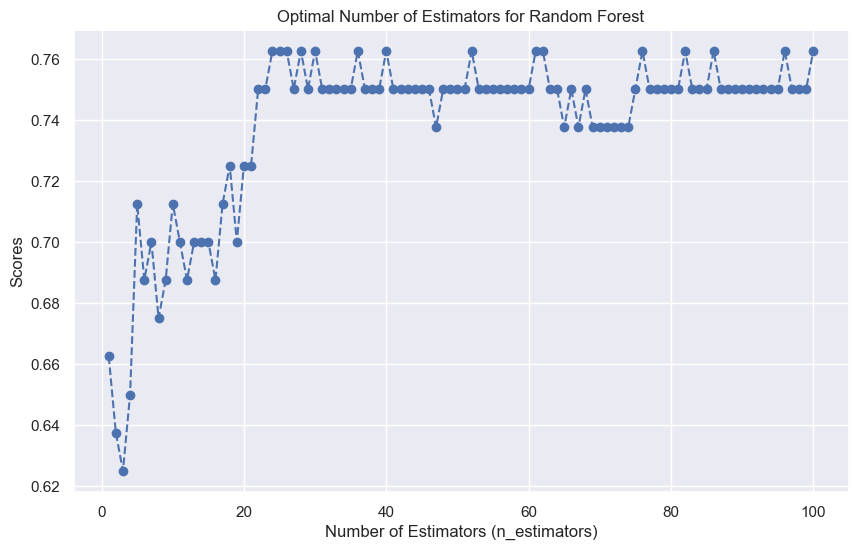

In [58]:
plt.figure(figsize=(10,6))
plt.plot(n_estimate_range,score,marker='o',color='b',linestyle='--')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Scores')
plt.title('Optimal Number of Estimators for Random Forest')
plt.grid(True)
plt.show()

<b>Number of Estimators(trees) are constant between 50 to 60 and also between 85 to 95. Therefore 50 estimators holds good in our case

<b>Hypertuning using Randomized Search CV

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
model_s2 = RandomForestClassifier(n_jobs=-1,random_state=43)
param_grid = {'criterion':['entropy','gini'],'max_depth':[2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators':[10,25,30,50,100,200]}
random_search = RandomizedSearchCV(model_s2,param_grid,scoring='accuracy',cv=5,return_train_score=True)

In [60]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=43),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': [10, 25, 30, 50, 100,
                                                         200]},
                   return_train_score=True, scoring='accuracy')

In [61]:
random_search.best_score_

0.71875

In [62]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=10, n_jobs=-1, random_state=43)

In [63]:
random_search.best_params_

{'n_estimators': 10,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

In [64]:
#Building a Model using results of RandomSarchCV
model_4 = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10,n_estimators=200,n_jobs=-1,random_state=43)
model_4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       n_estimators=200, n_jobs=-1, random_state=43)

In [65]:
y_pred_4 = model_4.predict(x_test)
y_pred_4

array(['Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High', 'High'],
      dtype=object)

In [66]:
print(confusion_matrix(y_test,y_pred_4))

[[29  9]
 [ 9 33]]


In [67]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

        High       0.76      0.76      0.76        38
         Low       0.79      0.79      0.79        42

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



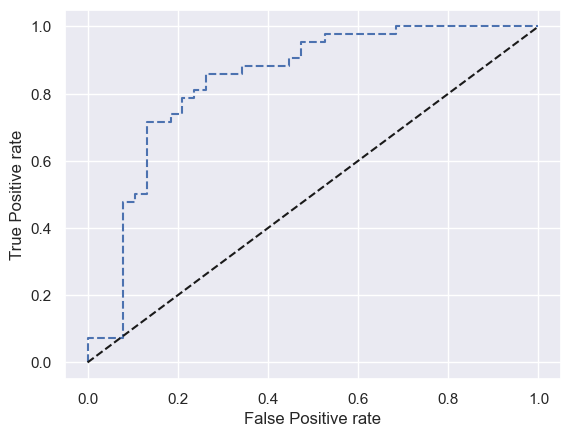

In [68]:
yp4 = LabelEncoder().fit_transform(y_pred_4)
fpr,tpr,threshold = roc_curve(yt,model_4.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp4)
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [69]:
auc

0.7744360902255638

In [70]:
importance = pd.DataFrame(model_4.feature_importances_,index=x.columns,columns=['Impotances'])
importance

,Impotances
CompPrice,0.112875
Income,0.079481
Advertising,0.147023
Population,0.076977
Price,0.342982
Age,0.165200
Education,0.031271
Urban_No,0.009901
Urban_Yes,0.008748
US_No,0.015025


<b>Random Forest Classifier using KFold Split

In [71]:
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10,shuffle=True,random_state=51)

In [72]:
accuracy_scores = []
for train_index,test_index in kf.split(x_scaled , y):
    x1_train , x1_test = x_scaled[train_index] , x_scaled[test_index]
    y1_train , y1_test = y[train_index] , y[test_index]
    rf = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10,n_estimators=200,n_jobs=-1,random_state=43)
    rf.fit(x1_train,y1_train)
    y_predict = rf.predict(x1_test)
    accuracy_scores.append(accuracy_score(y1_test,y_predict))
accuracy_scores

[0.8, 0.7, 0.65, 0.875, 0.625, 0.725, 0.65, 0.7, 0.75, 0.8]

In [73]:
np.mean(accuracy_scores)

0.7274999999999999

<b>Random Forest Classifier using KFold Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
kf2 = KFold(n_splits=10,shuffle=True,random_state=51)
rf2 = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10,n_estimators=200,n_jobs=-1,random_state=43)
result = cross_val_score(rf2,x_scaled,y,cv=kf2)
print(result.mean())

0.7274999999999999


<b>Random Forest Classifier using AdaBoostClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier
rf3 = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10,n_estimators=200,n_jobs=-1,random_state=43)
rf_boost = AdaBoostClassifier(estimator=rf3, n_estimators=2, random_state=22)
rf_boost.fit(x_train,y_train)
y_p = rf_boost.predict(x_test)
print('Confusion_matrix : ','\n',confusion_matrix(y_test,y_p))
print('======================================================================================================')
print('Classification_report : ','\n',classification_report(y_test,y_p))

Confusion_matrix :  
 [[29  9]
 [ 9 33]]
Classification_report :  
               precision    recall  f1-score   support

        High       0.76      0.76      0.76        38
         Low       0.79      0.79      0.79        42

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



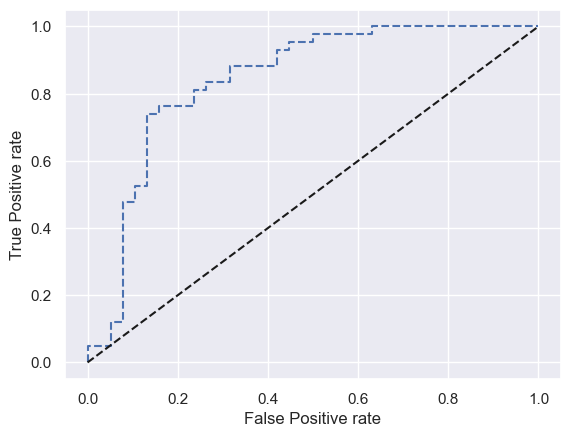

In [76]:
yp5 = LabelEncoder().fit_transform(y_p)
fpr,tpr,threshold = roc_curve(yt,rf_boost.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp5)
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [77]:
auc

0.7744360902255638

<b>Conclusion
    
<b>Random Forest Classifier with Randomized Search CV has the best Results of all Models. Hence we can consider it has our final Model